In [17]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [18]:
# We'll load the Iri datset
ir = sns.load_dataset("iris")
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
ir.species.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [19]:
ir.shape

(150, 5)

In [20]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
ir.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
# Understanding the data
ir["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [23]:
ir.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [24]:
ir.species.replace({'setosa':0, "versicolor":1,'virginica':2 }, inplace=True)

In [25]:
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
from sklearn.model_selection import train_test_split

ir_train,ir_test=train_test_split(ir,test_size=.2)

In [27]:
ir_train_x=ir_train.iloc[:,0:-1]
ir_train_y=ir_train.iloc[:,-1]

ir_test_x=ir_test.iloc[:,0:-1]
ir_test_y=ir_test.iloc[:,-1]

In [32]:
from keras.models import Sequential 
from keras.layers import  Dense 
from tensorflow.keras.utils import to_categorical


In [33]:
model = Sequential()
model.add(Dense(100,input_shape=(4,),activation="relu"))
model.add(Dense(3, activation='softmax'))
# sequential means the exexicution of the model

In [34]:
model.compile(optimizer= 'adam',loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])

#use other optimizer(sgd)check the accuracy

In [37]:
#history = model.fit(ir_train_x_std, ir_train_y, validation_split=0.1, epochs=20)
model1= model.fit(ir_train_x ,ir_train_y , epochs=20 ,validation_split=.2,batch_size =32)

Epoch 1/20
3/3 [==============================] - 0s 46ms/step - loss: 0.3999 - accuracy: 0.8854 - val_loss: 0.5227 - val_accuracy: 0.7917
Epoch 2/20
3/3 [==============================] - 0s 21ms/step - loss: 0.3944 - accuracy: 0.8958 - val_loss: 0.5170 - val_accuracy: 0.8333
Epoch 3/20
3/3 [==============================] - 0s 22ms/step - loss: 0.3896 - accuracy: 0.9062 - val_loss: 0.5114 - val_accuracy: 0.8333
Epoch 4/20
3/3 [==============================] - 0s 18ms/step - loss: 0.3844 - accuracy: 0.9271 - val_loss: 0.5067 - val_accuracy: 0.8333
Epoch 5/20
3/3 [==============================] - 0s 18ms/step - loss: 0.3799 - accuracy: 0.9167 - val_loss: 0.5018 - val_accuracy: 0.8333
Epoch 6/20
3/3 [==============================] - 0s 18ms/step - loss: 0.3746 - accuracy: 0.9062 - val_loss: 0.4976 - val_accuracy: 0.8333
Epoch 7/20
3/3 [==============================] - 0s 18ms/step - loss: 0.3698 - accuracy: 0.9062 - val_loss: 0.4933 - val_accuracy: 0.8333
Epoch 8/20
3/3 [===========

In [41]:
model.evaluate(ir_test_x,ir_test_y)

1/1 [==============================] - 0s 30ms/step - loss: 0.5076 - accuracy: 0.9000


[0.5076186656951904, 0.8999999761581421]

In [52]:
pred=model.predict(ir_test_x)
pred

1/1 [==============================] - 0s 17ms/step


array([[0.10398124, 0.5689037 , 0.32711503],
       [0.01248276, 0.44221064, 0.5453066 ],
       [0.08272808, 0.50999737, 0.40727457],
       [0.0048571 , 0.21535397, 0.7797889 ],
       [0.04489155, 0.40830386, 0.5468046 ],
       [0.8926953 , 0.09409193, 0.01321265],
       [0.02846486, 0.35181898, 0.6197162 ],
       [0.00501181, 0.2546993 , 0.7402889 ],
       [0.00206358, 0.29583156, 0.7021048 ],
       [0.00560156, 0.3080438 , 0.6863546 ],
       [0.00852565, 0.34391725, 0.6475571 ],
       [0.9155489 , 0.0765339 , 0.00791712],
       [0.15330581, 0.53649735, 0.31019682],
       [0.08308977, 0.576745  , 0.34016526],
       [0.00862739, 0.22776164, 0.76361096],
       [0.00439134, 0.23792733, 0.7576813 ],
       [0.09560349, 0.48830044, 0.4160961 ],
       [0.05356185, 0.48815477, 0.45828333],
       [0.00590561, 0.20408092, 0.7900135 ],
       [0.07938108, 0.49692243, 0.4236965 ],
       [0.24373494, 0.5046042 , 0.25166082],
       [0.05409864, 0.46201178, 0.48388958],
       [0.

In [53]:
pred_classes = np.argmax(pred , axis =1 )

In [54]:
print(pred_classes)
print(ir_test_y)

[1 2 1 2 2 0 2 2 2 2 2 0 1 1 2 2 1 1 2 1 1 2 1 1 1 1 0 1 2 2]
67     1
129    2
99     1
144    2
66     1
8      0
70     1
128    2
122    2
102    2
134    2
9      0
93     1
75     1
148    2
132    2
88     1
91     1
136    2
96     1
98     1
56     1
86     1
65     1
73     1
74     1
45     0
52     1
138    2
111    2
Name: species, dtype: int64


In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
ir_test_y.shape

(30,)

In [57]:
pred_classes.shape

(30,)

In [58]:
from sklearn.metrics import confusion_matrix
tab=confusion_matrix(ir_test_y ,pred_classes )
tab

array([[ 3,  0,  0],
       [ 0, 13,  3],
       [ 0,  0, 11]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(ir_test_y ,pred_classes )

0.9

In [68]:


from sklearn import metrics 
from sklearn.metrics import f1_score

classification_report = metrics.classification_report(ir_test_y ,pred_classes )

print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.81      0.90        16
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.92      0.90      0.90        30



In [61]:
df1 = pd.DataFrame(model1.history)
df1

,loss,accuracy,val_loss,val_accuracy
0,0.399915,0.885417,0.522727,0.791667
1,0.394396,0.895833,0.516966,0.833333
2,0.389589,0.906250,0.511393,0.833333
3,0.384381,0.927083,0.506711,0.833333
4,0.379932,0.916667,0.501751,0.833333
5,0.374571,0.906250,0.497574,0.833333
6,0.369814,0.906250,0.493279,0.833333
7,0.365938,0.906250,0.489163,0.833333
8,0.361895,0.906250,0.485188,0.833333
9,0.357969,0.906250,0.480865,0.833333


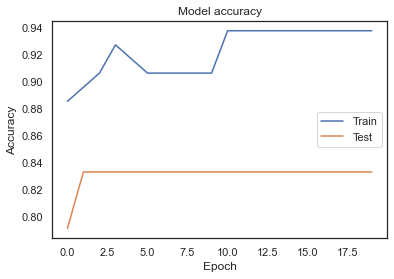

In [67]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

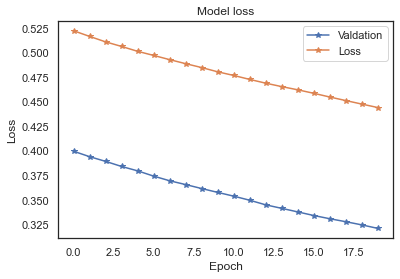

In [63]:
plt.plot(model1.history['loss'],marker='*')
plt.plot(model1.history['val_loss'],marker='*') 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Valdation', 'Loss'], loc='upper right') 
plt.show()